In [ ]:
import pandas as pd
import seaborn as sas
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Proad Data.csv')
df[0:3]

,Cust Code,Delivery Period,Department Name,Emp Name,EMPCode (MEMP),Fiscal Date,Form Type,Item Code,Machine Code,Operation Name,...,Per day Machine Cost made,Press Qty,Processed Qty,Produced Qty,Rejected Qty,Repeat,today Manufactured qty,TotalQty,TotalValue,WO Qty
0,C000589,On Time,Woven Lables,Shruti Singh,EM144,09-11-2015,Printed Labels,PL-HM-HM30K-S-OW-BF1,MC033,Cut & Fold,...,1403.0,0.0,6140.0,6140.0,0.0,0.0,0,166192.0,106362.88,6226.0
1,C000589,On Time,Woven Lables,Shruti Singh,EM144,09-11-2015,Printed Labels,PL-HM-HM30K-S-OW-BF1,MC033,Cut & Fold,...,1403.0,0.0,6308.0,6308.0,0.0,0.0,0,166192.0,106362.88,6433.0
2,C000589,On Time,Woven Lables,Shruti Singh,EM144,09-11-2015,Printed Labels,PL-HM-HM30K-S-OW-BF1,MC033,Cut & Fold,...,1403.0,0.0,6257.0,6257.0,0.0,0.0,0,166192.0,106362.88,6344.0


In [ ]:
#total manufaxtured qty
x=round(df['ManufacturedQty'].sum(),2)
print('total manufactured qty is:',x)

total manufactured qty is: 86766796.0


In [ ]:
#total rejected  qty
y=round(df['Rejected Qty'].sum(),2)
print('total rejected qty is:',y)

total rejected qty is: 524729.0


In [ ]:
#total processed qty
z=round(df['Processed Qty'].sum(),2)
print('total processed qty is:',z)

total processed qty is: 86242067.0


In [ ]:
# wastage percentage
a=(df['Rejected Qty'].sum()/df['Processed Qty'].sum())*100
print('the total % of wastage is:',a)

the total % of wastage is: 0.6084374114085184


Emp Name
Shruti Singh     520867.0
RAM JI              500.0
SANTOSH KUMAR       350.0
BITTU mishra        290.0
raj  kumar          250.0
Name: Rejected Qty, dtype: float64


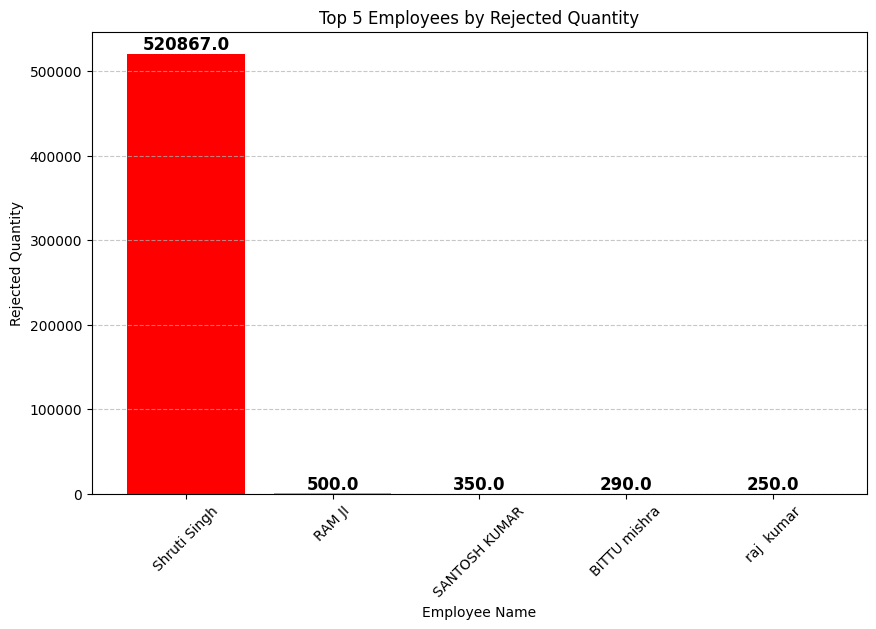

In [ ]:
# Top 5 employ wise rejecter
x=df.groupby('Emp Name')['Rejected Qty'].sum()
top_5=x.nlargest(5) # this function used to agregate the top 5 employs base on rejected qty
print(top_5)
# plotting the bar chart of this
import matplotlib.pyplot as plt
import seaborn as sas
plt.figure(figsize=(10, 6))
bars=plt.bar(top_5.index, top_5.values, color=['red', 'orange', 'yellow', 'blue', 'green'])

# Adding labels and title
plt.xlabel('Employee Name')
plt.ylabel('Rejected Quantity')
plt.title('Top 5 Employees by Rejected Quantity')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

Machine Code
MC025    33660.0
MC129    26480.0
MC048    23480.0
MC049    22773.0
MC126    21030.0
Name: Rejected Qty, dtype: float64


Text(0.5, 1.0, 'Top 5 Machine wise Rejected Qty')

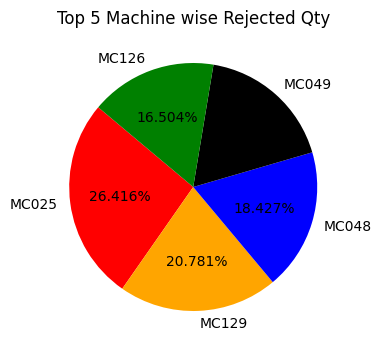

In [ ]:
# Top 5 machine wise rejected qty
j=df.groupby('Machine Code')['Rejected Qty'].sum()
top_5j=j.nlargest(5) # this function used to agregate the top 5 employs base on rejected qty
print(top_5j)
# we are going to plot the bar grapth
plt.figure(figsize=(4,6))
plt.pie(top_5j,labels=top_5j.index,autopct='%1.3f%%',startangle=140,colors=['red','orange','blue','black','green'])
plt.title('Top 5 Machine wise Rejected Qty')

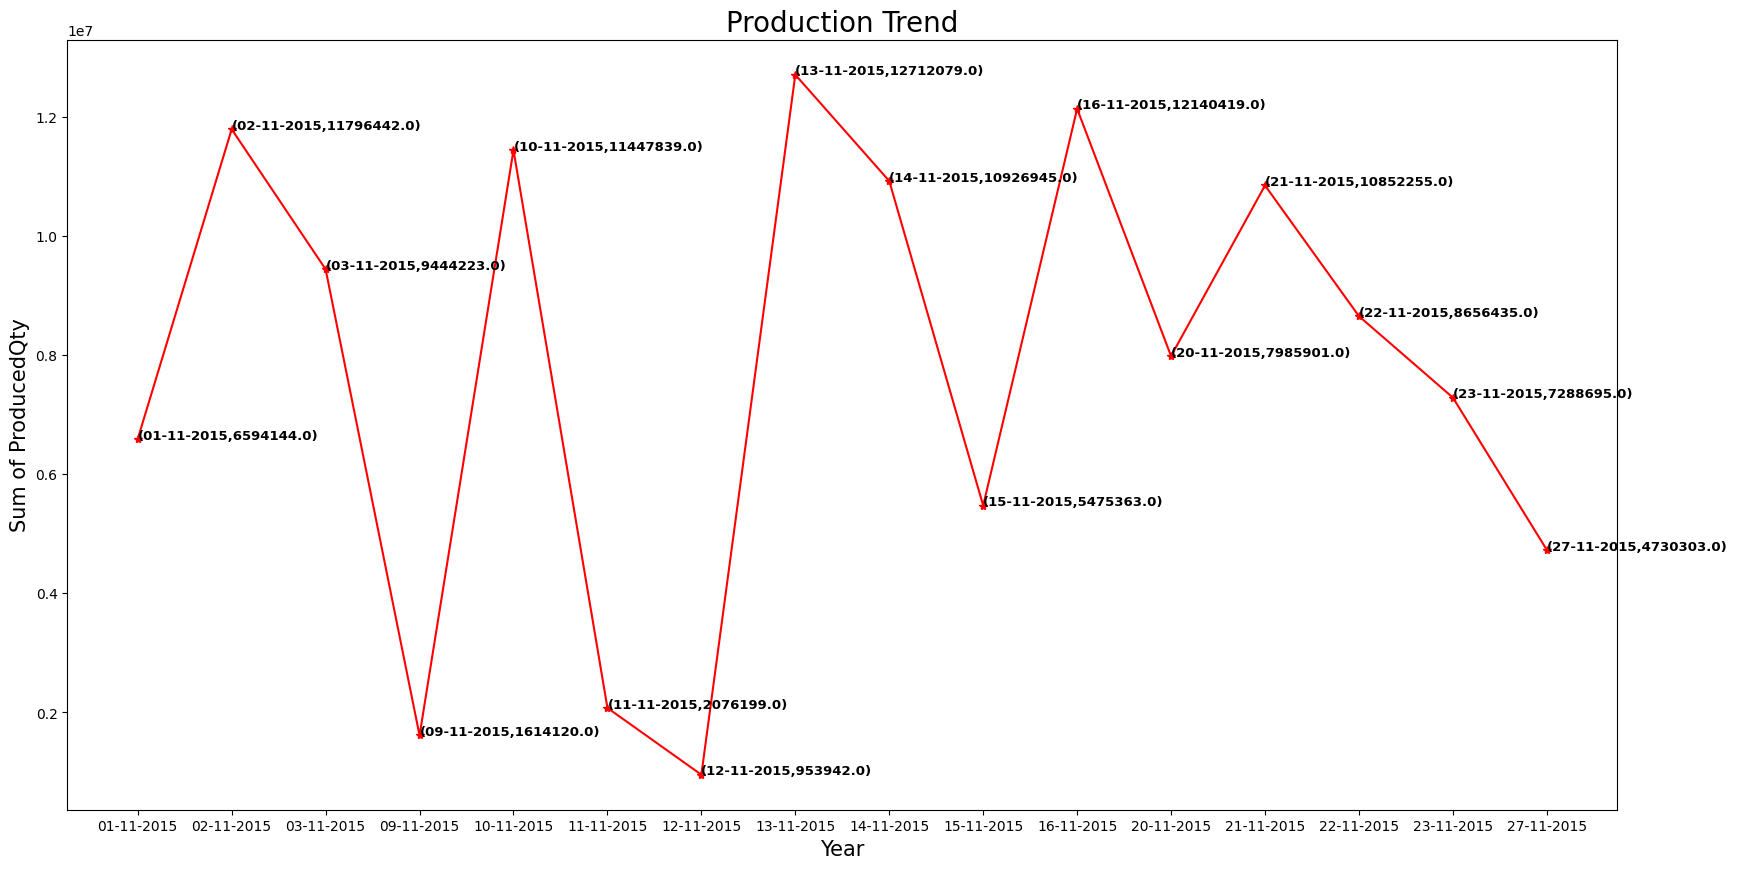

In [ ]:
# Production trend
df[0:4]
x=pd.DataFrame(df.groupby('Fiscal Date')['Produced Qty'].sum())
plt.figure(figsize=(20,10))
plt.plot(x.index,x['Produced Qty'],'r*-')
plt.xlabel('Year', size =15)
plt.ylabel('Sum of ProducedQty', size =15)
plt.title('Production Trend', size= 20)
for i,j in zip(x.index, round(x['Produced Qty'],2)):
  plt.text(i,j,'({},{})'.format(i,j),size=9.5,fontweight='bold')


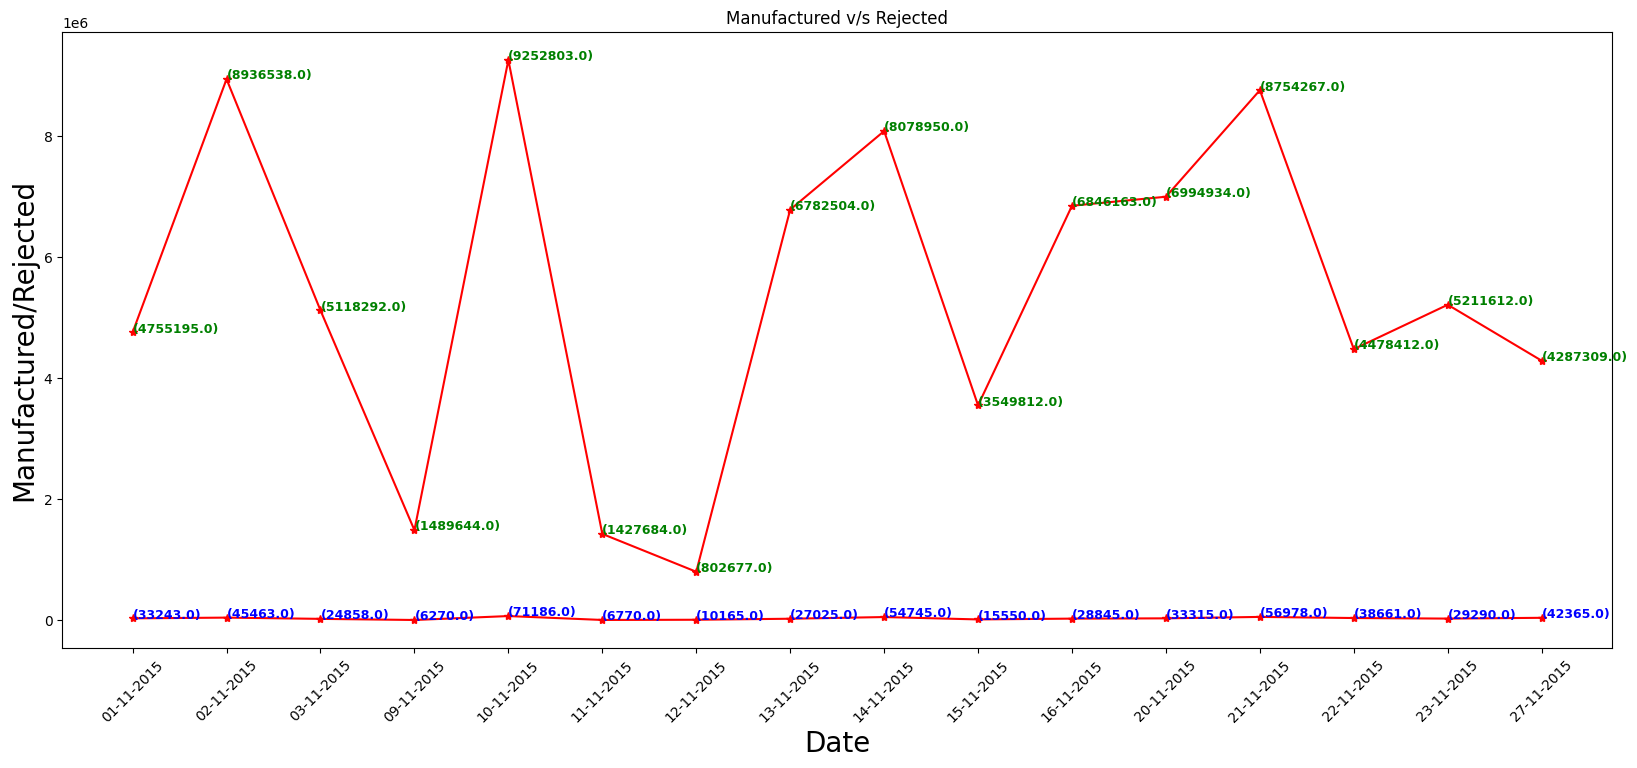

             ManufacturedQty  Rejected Qty
Fiscal Date                               
01-11-2015         4755195.0       33243.0
02-11-2015         8936538.0       45463.0
03-11-2015         5118292.0       24858.0
09-11-2015         1489644.0        6270.0
10-11-2015         9252803.0       71186.0
11-11-2015         1427684.0        6770.0
12-11-2015          802677.0       10165.0
13-11-2015         6782504.0       27025.0
14-11-2015         8078950.0       54745.0
15-11-2015         3549812.0       15550.0
16-11-2015         6846163.0       28845.0
20-11-2015         6994934.0       33315.0
21-11-2015         8754267.0       56978.0
22-11-2015         4478412.0       38661.0
23-11-2015         5211612.0       29290.0
27-11-2015         4287309.0       42365.0


In [ ]:
# Manufactured v/s Rejected
x=pd.DataFrame(df.groupby('Fiscal Date')[['ManufacturedQty','Rejected Qty']].sum())
plt.figure(figsize=(20,8))
plt.plot(x.index,x[['ManufacturedQty','Rejected Qty']],'r*-')
plt.xlabel('Date',size=20)
plt.ylabel('Manufactured/Rejected',size=20)
plt.title('Manufactured v/s Rejected')
for date,i,j in zip(x.index,x['ManufacturedQty'],x['Rejected Qty']):
  plt.text(date,i,'({})'.format(i),fontweight='bold',fontsize=9,color='green')
  plt.text(date,j,'({})'.format(j),fontweight='bold',fontsize=9,color='blue')

plt.xticks(rotation=45)
plt.show()
print(x)

In [ ]:
# Department wise Manufatured v/s rejected
r=pd.DataFrame(df.groupby('Department Name')[['ManufacturedQty','Rejected Qty']].sum())
r[0:4]

,ManufacturedQty,Rejected Qty
Department Name,,
Printed Labels,28565990.0,3221.0
Woven Lables,58200806.0,521508.0


(array([0, 1]), [Text(0, 0, 'Printed Labels'), Text(1, 0, 'Woven Lables')])

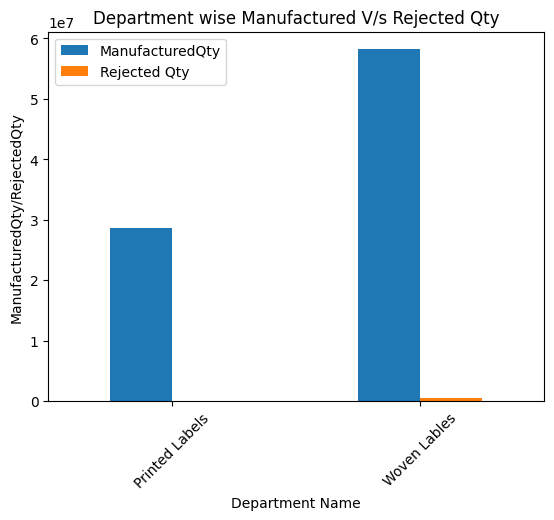

In [ ]:
import numpy as np
r.plot(kind='bar',xlabel='Department Name',ylabel='ManufacturedQty/RejectedQty',title='Department wise Manufactured V/s Rejected Qty')
plt.xticks(rotation=45)



In [1]:
from google.colab import drive


NameError: name 'Copy_to_Drive' is not defined